In [ ]:
!pip install np_utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import string
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=2aa90055edd975323171838291280c30ebf1d0caddec2db7017009b8a8f62c1a
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
data = pd.read_csv('data.csv')
data.head()

Description  \
0   A 23-year-old white female presents with comp...   
1           Consult for laparoscopic gastric bypass.   
2           Consult for laparoscopic gastric bypass.   
3                             2-D M-Mode. Doppler.     
4                                 2-D Echocardiogram   

             Medical_Specialty                                Sample_Name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       Transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            Keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

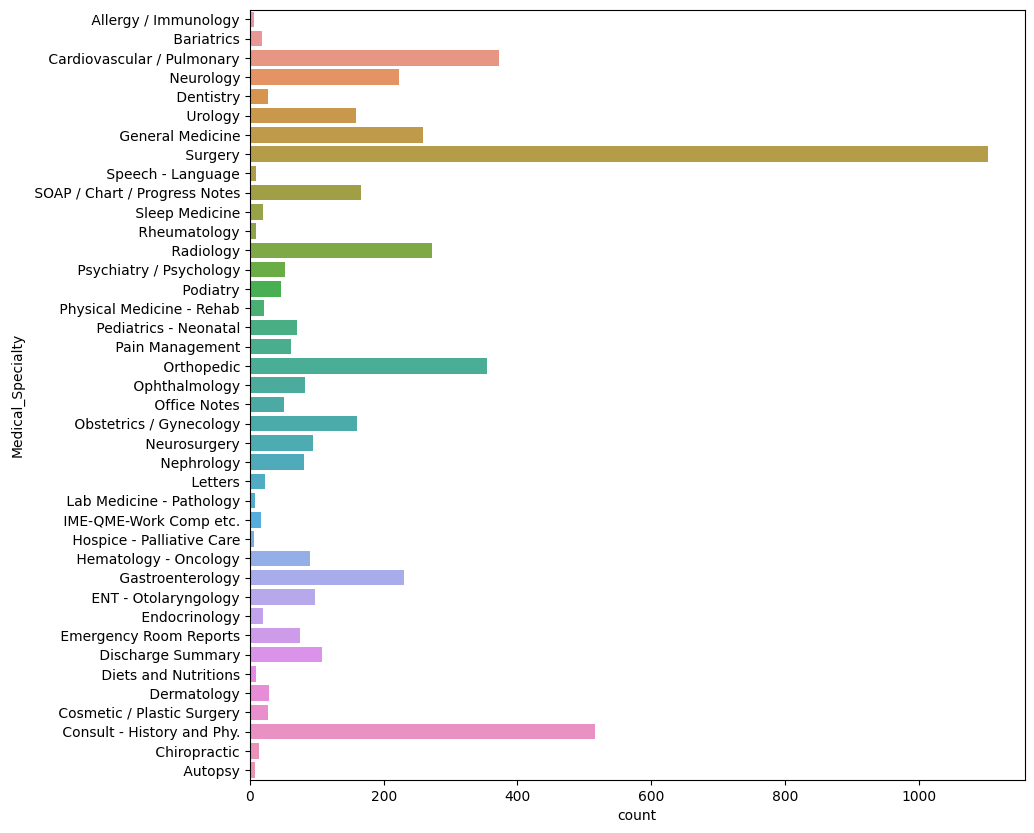

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Medical_Specialty'], data = data)
plt.show()

In [ ]:
corp_data = data[['Transcription', 'Medical_Specialty']]
corp_data = corp_data.dropna()
corp_data.head()

Transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

             Medical_Specialty  
0         Allergy / Immunology  
1                   Bariatrics  
2                   Bariatrics  
3   Cardiovascular / Pulmonary  
4   Cardiovascular / Pulmonary

In [ ]:
corp_data.Medical_Specialty.value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [ ]:
corp_data = corp_data[corp_data['Transcription'].notna()]
test  = corp_data.groupby(corp_data['Medical_Specialty'])
filt_corp = test.filter(lambda x:x.shape[0] > 70)

In [ ]:
filt_corp['Medical_Specialty'] =filt_corp['Medical_Specialty'].apply(lambda x:str.strip(x))

test = filt_corp['Medical_Specialty'] == 'SOAP / Chart / Progress Notes'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Discharge Summary'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Emergency Room Reports'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Surgery'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Consult - History and Phy.'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'General Medicine'
filt_corp = filt_corp[~test]
test = filt_corp['Medical_Specialty'] == 'Radiology'
filt_corp = filt_corp[~test]

test = filt_corp['Medical_Specialty'] == 'Neurosurgery'
filt_corp.loc[test, 'Medical_Specialty'] = 'Neurology'

In [ ]:
filt_corp.Medical_Specialty.value_counts()

Cardiovascular / Pulmonary    371
Orthopedic                    355
Neurology                     317
Gastroenterology              224
Urology                       156
Obstetrics / Gynecology       155
ENT - Otolaryngology           96
Hematology - Oncology          90
Ophthalmology                  83
Nephrology                     81
Name: Medical_Specialty, dtype: int64

In [ ]:
possible_labels = filt_corp.Medical_Specialty.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
print(label_dict)

filt_corp['Labels'] = filt_corp.Medical_Specialty.replace(label_dict)
filt_corp.head()

{'Cardiovascular / Pulmonary': 0, 'Neurology': 1, 'Urology': 2, 'Orthopedic': 3, 'Ophthalmology': 4, 'Obstetrics / Gynecology': 5, 'Nephrology': 6, 'Hematology - Oncology': 7, 'Gastroenterology': 8, 'ENT - Otolaryngology': 9}


Transcription  \
3   2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4   1.  The left ventricular cavity size and wall ...   
7   2-D ECHOCARDIOGRAM,Multiple views of the heart...   
9   DESCRIPTION:,1.  Normal cardiac chambers size....   
11  2-D STUDY,1. Mild aortic stenosis, widely calc...   

             Medical_Specialty  Labels  
3   Cardiovascular / Pulmonary       0  
4   Cardiovascular / Pulmonary       0  
7   Cardiovascular / Pulmonary       0  
9   Cardiovascular / Pulmonary       0  
11  Cardiovascular / Pulmonary       0

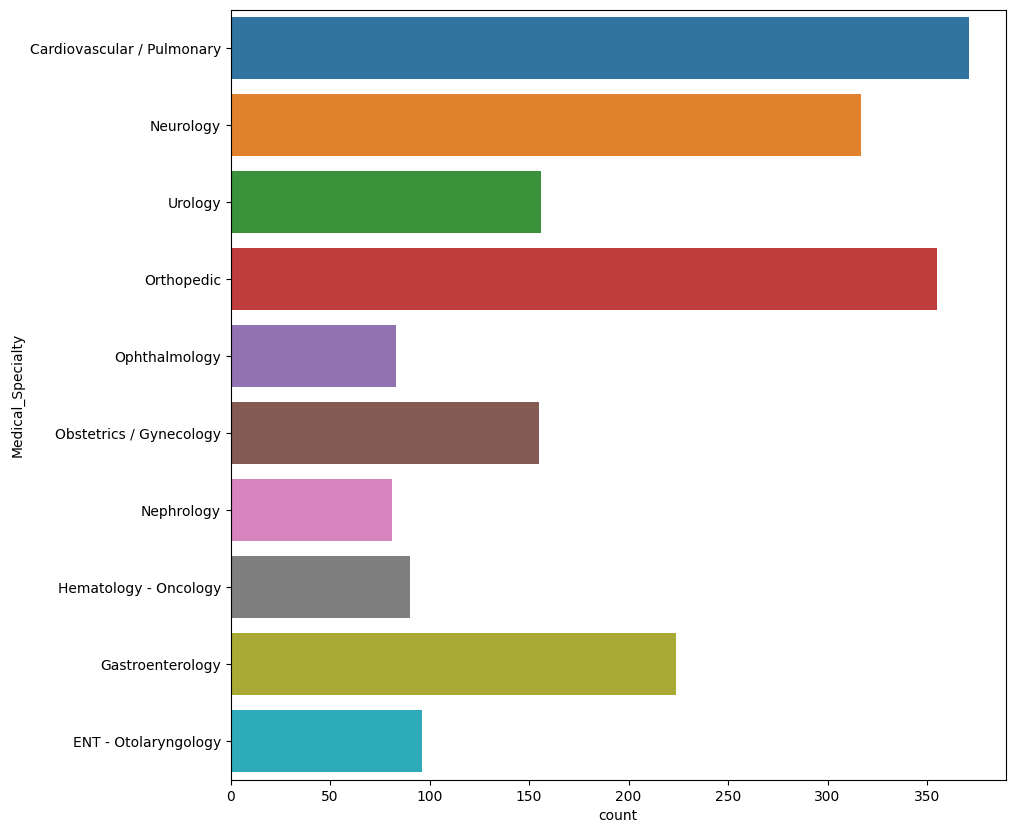

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=filt_corp['Medical_Specialty'], data = filt_corp)
plt.show()

In [ ]:
filt_corp.shape

(1928, 3)

In [ ]:
X = filt_corp.drop('Labels', axis =1)
y = pd.get_dummies(filt_corp['Labels']).values

In [ ]:
print(X.shape)
print(y.shape)

(1928, 2)
(1928, 10)


In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
info = X.copy()
info.reset_index(inplace=True)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
SW = stopwords.words("english")
SW.extend(['noted', 'time', 'preoperative', 'diagnosis', 'postoperative', 'well'])
Lstem = WordNetLemmatizer()
nltk_corpus = []
for i in range(0, len(info)):
  print(i)
  transcript = re.sub('[^ a-zA-Z]', ' ', str(info['Transcription'][i]))
  transcript = transcript.lower()
  transcript = transcript.translate(str.maketrans("", "", string.punctuation))
  transcript = transcript.split()
  transcript = [Lstem.lemmatize(word) for word in transcript if not word in SW]
  transcript = ' '.join(transcript)
  nltk_corpus.append(transcript)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
nltk_corpus[10]

'voluntary sterility voluntary sterility operative procedure bilateral vasectomy anesthesia local indication procedure gentleman today requesting voluntary sterility option discussed voluntary sterility elected proceed bilateral vasectomy description procedure patient brought operating room appropriately identifying patient patient prepped draped standard surgical fashion placed supine position table marcaine without epinephrine used anesthetize scrotal skin small incision made right hemiscrotum va deferens grasped va clamp next va deferens skeletonized clipped proximally distally twice cut edge fulgurated meticulous hemostasis maintained chromic used close scrotal skin right hemiscrotum next attention turned left hemiscrotum left hemiscrotum anesthetized appropriately small incision made left hemiscrotum va deferens isolated skeletonized clipped proximally distally twice cut edge fulgurated meticulous hemostasis maintained chromic used close scrotal skin jockstrap sterile dressing app

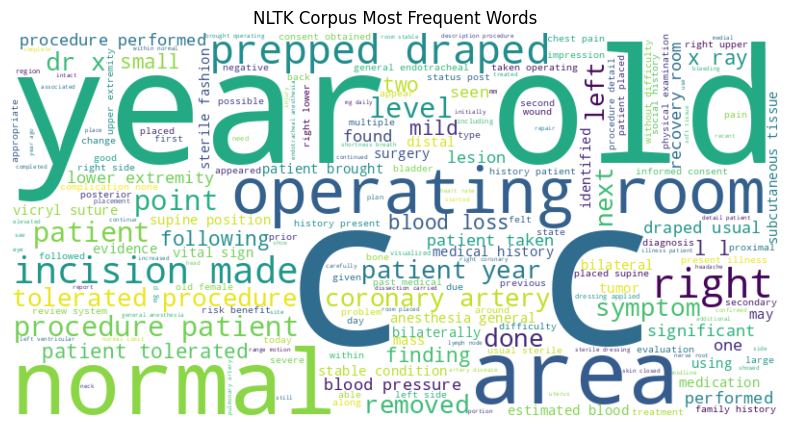

In [ ]:
# Step 2: Create a WordCloud
wordcloud = WordCloud(width=800, height=400,max_words= 200, background_color='white').generate(" ".join(nltk_corpus))

# Step 3: Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('NLTK Corpus Most Frequent Words')
plt.axis('off')
plt.show()

In [ ]:
max_vocab = 4000
hothot = [one_hot(words, max_vocab) for words in nltk_corpus]
hothot

[[1746,
  3787,
  376,
  657,
  3787,
  376,
  943,
  1855,
  1071,
  1478,
  3160,
  3787,
  889,
  1071,
  607,
  62,
  3069,
  3787,
  1298,
  3447,
  2227,
  1071,
  607,
  3979,
  3069,
  2807,
  280,
  1071,
  1361,
  875,
  3519,
  2746,
  3519,
  591,
  3519,
  372,
  3519,
  410,
  62,
  2286,
  3972,
  3658,
  3306,
  2746,
  591,
  1436,
  2228,
  875,
  372,
  1436],
 [3787,
  1298,
  2879,
  1478,
  2997,
  3112,
  290,
  1071,
  2997,
  574,
  3787,
  1298,
  62,
  3069,
  532,
  1933,
  1541,
  3447,
  2227,
  1787,
  2879,
  515,
  1910,
  1925,
  532,
  743,
  3787,
  1298,
  972,
  3039,
  611,
  1354,
  2879,
  2878,
  131,
  1933,
  3787,
  1298,
  62,
  3069,
  2921,
  3787,
  1298,
  2399,
  3859,
  1910,
  879,
  3787,
  376,
  2286,
  1910,
  3658,
  3995,
  3787,
  1485,
  532,
  852,
  2282,
  3160,
  1485,
  3160,
  889,
  290,
  1071,
  875,
  3619,
  532,
  1071,
  875,
  3519,
  532,
  3174,
  3306,
  875,
  3519,
  3175,
  1053,
  875,
  3519,
  2880,
  1

In [ ]:
sent_len = 200
embed = pad_sequences(hothot, padding='pre', maxlen= sent_len)
print(len(embed))
print(embed)

1928
[[   0    0    0 ...  875  372 1436]
 [   0    0    0 ... 3390  530 2600]
 [   0    0    0 ... 1953 3006  811]
 ...
 [  90 1812 1081 ... 1035   69 1890]
 [   0    0    0 ... 2662 1153 3009]
 [3857 3279 1487 ... 1071  607 3069]]


In [ ]:
embed_vec = 50
model = Sequential()
model.add(Embedding(max_vocab, embed_vec, input_length=sent_len))
model.add(LSTM(100,dropout = 0.5, recurrent_dropout=0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           200000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 261410 (1021.13 KB)
Trainable params: 261410 (1021.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
X_mod = np.array(embed)
y_mod = np.array(y)
print(len(embed))
print(y.shape)
print(X_mod.shape)
print(y_mod.shape)

1928
(1928, 10)
(1928, 200)
(1928, 10)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size= 0.2, random_state=42, stratify=y_mod)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1542, 200) (1542, 10)
(386, 200) (386, 10)


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
history = model.fit(X_train_fold, y_train_fold, validation_data=(X_test_fold, y_test_fold), epochs = 15, batch_size=64)

Epoch 1/15
23/23 [==============================] - 9s 198ms/step - loss: 2.2389 - accuracy: 0.1875 - val_loss: 2.1479 - val_accuracy: 0.1863
Epoch 2/15
23/23 [==============================] - 4s 179ms/step - loss: 2.1199 - accuracy: 0.2451 - val_loss: 2.0853 - val_accuracy: 0.3039
Epoch 3/15
23/23 [==============================] - 4s 171ms/step - loss: 1.9616 - accuracy: 0.2722 - val_loss: 1.8911 - val_accuracy: 0.3039
Epoch 4/15
23/23 [==============================] - 4s 172ms/step - loss: 1.7253 - accuracy: 0.2889 - val_loss: 1.7057 - val_accuracy: 0.4216
Epoch 5/15
23/23 [==============================] - 4s 184ms/step - loss: 1.5511 - accuracy: 0.4181 - val_loss: 1.6564 - val_accuracy: 0.3627
Epoch 6/15
23/23 [==============================] - 4s 171ms/step - loss: 1.5404 - accuracy: 0.4160 - val_loss: 1.6583 - val_accuracy: 0.3431
Epoch 7/15
23/23 [==============================] - 4s 173ms/step - loss: 1.5572 - accuracy: 0.4306 - val_loss: 1.8889 - val_accuracy: 0.3431
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 30ms/step - loss: 1.4468 - accuracy: 0.5294
Test Accuracy: 0.529411792755127


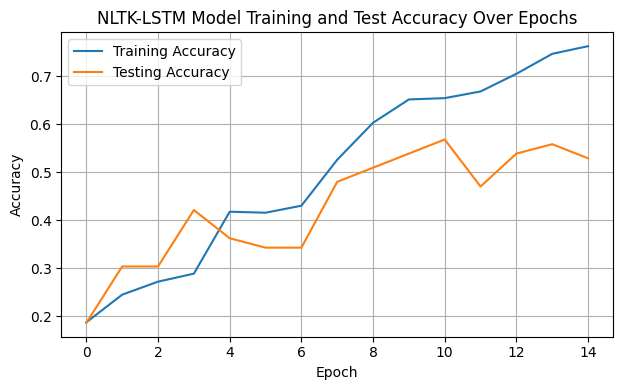

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('NLTK-LSTM Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

4/4 [==============================] - 0s 26ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.74      0.62        19
           1       0.55      0.35      0.43        17
           2       0.21      0.75      0.33         4
           3       0.86      0.63      0.73        19
           4       0.71      0.83      0.77         6
           5       0.56      0.56      0.56         9
           6       0.00      0.00      0.00         4
           7       0.33      0.17      0.22         6
           8       0.44      0.57      0.50        14
           9       0.00      0.00      0.00         4

    accuracy                           0.53       102
   macro avg       0.42      0.46      0.42       102
weighted avg       0.53      0.53      0.51       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


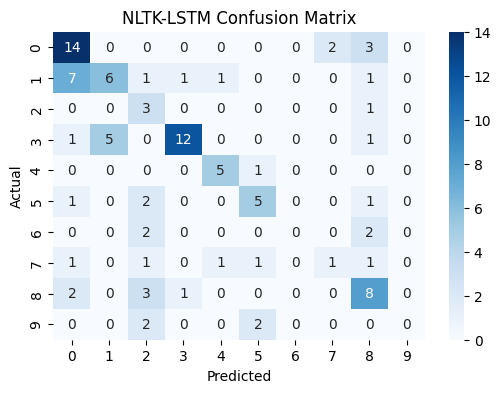

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_fold, axis=1)
cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NLTK-LSTM Confusion Matrix")
plt.show()


**DEEP BELIEF NETWORK MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(nltk_corpus).toarray()

In [ ]:
label_encoder = LabelEncoder()
labels = filt_corp['Labels']
y = label_encoder.fit_transform(labels)
num_classes = 10

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
y_train_one_hot = to_categorical(y_train_fold, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_fold, num_classes=num_classes)

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               1623400   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 1628960 (6.21 MB)
Trainable params: 1628960 (6.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history2 = model.fit(X_train_fold, y_train_one_hot, validation_data=(X_test_fold, y_test_one_hot),epochs=10, batch_size=32, verbose=1)

Epoch 1/10
45/45 [==============================] - 1s 14ms/step - loss: 2.1613 - accuracy: 0.3083 - val_loss: 1.7895 - val_accuracy: 0.4804
Epoch 2/10
45/45 [==============================] - 0s 10ms/step - loss: 1.6043 - accuracy: 0.5007 - val_loss: 1.0899 - val_accuracy: 0.7745
Epoch 3/10
45/45 [==============================] - 0s 10ms/step - loss: 0.9856 - accuracy: 0.7597 - val_loss: 0.6768 - val_accuracy: 0.8235
Epoch 4/10
45/45 [==============================] - 0s 11ms/step - loss: 0.5927 - accuracy: 0.8396 - val_loss: 0.5128 - val_accuracy: 0.8431
Epoch 5/10
45/45 [==============================] - 0s 10ms/step - loss: 0.3796 - accuracy: 0.9014 - val_loss: 0.4744 - val_accuracy: 0.8333
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 0.2719 - accuracy: 0.9236 - val_loss: 0.4819 - val_accuracy: 0.8431
Epoch 7/10
45/45 [==============================] - 0s 10ms/step - loss: 0.2506 - accuracy: 0.9174 - val_loss: 0.4972 - val_accuracy: 0.8333
Epoch 8/10
45

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_one_hot, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.5615 - accuracy: 0.8431
Test Accuracy: 0.843137264251709


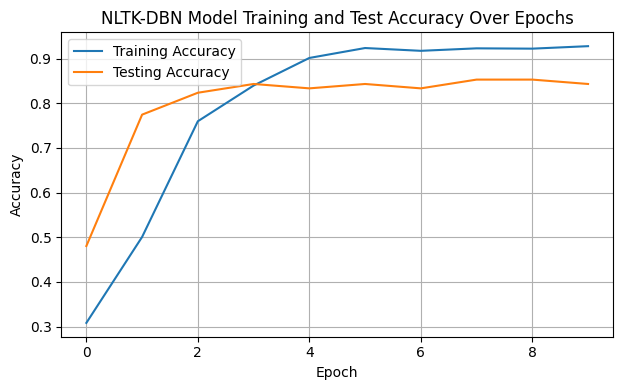

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('NLTK-DBN Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.72      0.87      0.79        15
           2       0.80      0.80      0.80         5
           3       0.83      0.87      0.85        23
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         7
           6       0.50      0.50      0.50         6
           7       0.67      0.67      0.67         3
           8       1.00      0.83      0.91        12
           9       0.67      0.67      0.67         3

    accuracy                           0.84       102
   macro avg       0.81      0.78      0.79       102
weighted avg       0.85      0.84      0.84       102



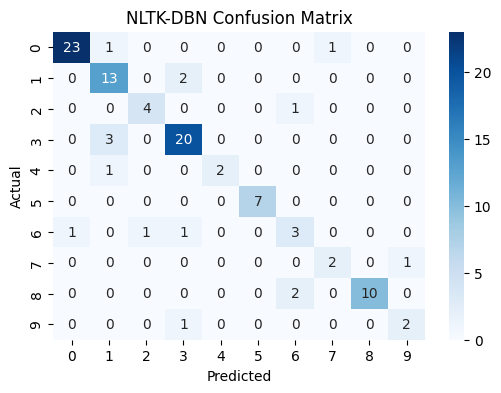

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_one_hot, axis=1)
cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NLTK-DBN Confusion Matrix")
plt.show()

**CONVOLUTED NEURAL NETWORK MODEL**

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
model = Sequential()
model.add(Embedding(max_vocab, embed_vec, input_length=sent_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           200000    
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          32128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size= 0.2, random_state=42, stratify=y_mod)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
history3 = model.fit(X_train_fold, y_train_fold, validation_data=(X_test_fold, y_test_fold), epochs = 15, batch_size=64)

Epoch 1/15
23/23 [==============================] - 2s 32ms/step - loss: 2.2719 - accuracy: 0.1576 - val_loss: 2.2186 - val_accuracy: 0.2549
Epoch 2/15
23/23 [==============================] - 1s 24ms/step - loss: 2.1761 - accuracy: 0.2222 - val_loss: 2.1471 - val_accuracy: 0.2843
Epoch 3/15
23/23 [==============================] - 1s 23ms/step - loss: 2.1093 - accuracy: 0.2521 - val_loss: 2.0989 - val_accuracy: 0.3529
Epoch 4/15
23/23 [==============================] - 1s 24ms/step - loss: 2.0157 - accuracy: 0.3139 - val_loss: 2.0254 - val_accuracy: 0.3529
Epoch 5/15
23/23 [==============================] - 1s 24ms/step - loss: 1.8759 - accuracy: 0.3785 - val_loss: 1.8839 - val_accuracy: 0.3725
Epoch 6/15
23/23 [==============================] - 1s 24ms/step - loss: 1.6721 - accuracy: 0.4264 - val_loss: 1.7066 - val_accuracy: 0.4902
Epoch 7/15
23/23 [==============================] - 1s 25ms/step - loss: 1.4679 - accuracy: 0.4812 - val_loss: 1.5756 - val_accuracy: 0.5000
Epoch 8/15
23

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 0.8375 - accuracy: 0.7549
Test Accuracy: 0.7549019455909729


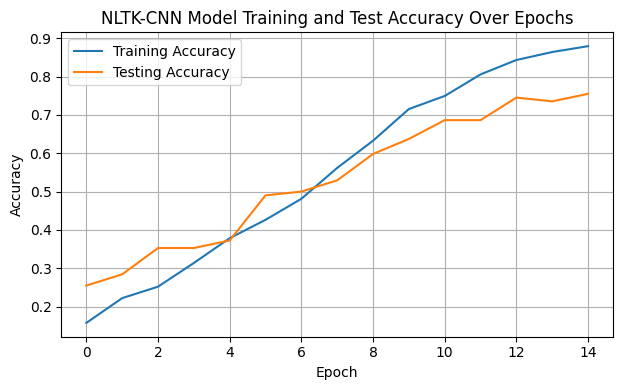

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('NLTK-CNN Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       0.80      0.71      0.75        17
           2       0.50      1.00      0.67         4
           3       0.84      0.84      0.84        19
           4       0.86      1.00      0.92         6
           5       0.88      0.78      0.82         9
           6       1.00      0.25      0.40         4
           7       1.00      0.17      0.29         6
           8       0.69      0.64      0.67        14
           9       0.67      0.50      0.57         4

    accuracy                           0.75       102
   macro avg       0.79      0.69      0.68       102
weighted avg       0.79      0.75      0.74       102



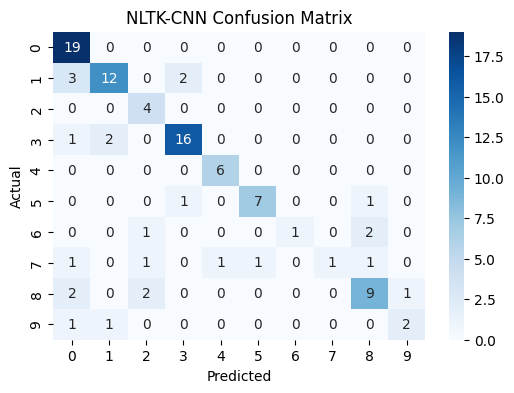

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_fold, axis=1)
cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NLTK-CNN Confusion Matrix")
plt.show()


**MULTILAYER PERCEPTRON MODEL**

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Embedding(max_vocab, embed_vec, input_length=sent_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 50)           200000    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1280128   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 1489034 (5.68 MB)
Trainable params: 1489

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.2, random_state=42, stratify=y)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, "Validation:", test_index)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  23   30   49   51   59   65   67   70   76   99  123  124  168  175
  220  239  240  259  270  275  306  316  331  332  342  351  354  371
  382  383  416  432  439  468  478  482  483  485  513  514  529  538
  548  561  567  582  599  614  615  619  621  636  664  674  679  680
  707  721  744  752  777  816  843  844  861  898  941  963  978 1001
 1037 1063 1083 1089 1098 1100 1149 1156 1197 1202 1211 1253 1268 1283
 1284 1285 1288 1290 1298 1305 1312 1320 1322 1339 1344 1416 1453 1474
 1491 1492 1504 1507 1511]
TRAIN: [   0    1    2 ... 1539 1540 1541] Validation: [  15   29   43   44   56   78  101  107  115  135  141  184  185  198
  203  237  244  309  324  339  350  353  365  366  380  381  405  422
  427  428  429  462  493  497  522  551  554  570  578  583  588  590
  598  620  629  668  669  670  672  677  727  736  743  772  782  787
  806  808  839  846  862  888  924  925  944  958  970 1004 1005 1006
 1013 1047 

In [ ]:
history4 = model.fit(X_train_fold, y_train_fold, validation_data=(X_test_fold, y_test_fold), epochs = 15, batch_size=64)

Epoch 1/15
23/23 [==============================] - 2s 19ms/step - loss: 2.2521 - accuracy: 0.1639 - val_loss: 2.1321 - val_accuracy: 0.3529
Epoch 2/15
23/23 [==============================] - 0s 12ms/step - loss: 2.0028 - accuracy: 0.3819 - val_loss: 1.8748 - val_accuracy: 0.3824
Epoch 3/15
23/23 [==============================] - 0s 12ms/step - loss: 1.4923 - accuracy: 0.4931 - val_loss: 1.5187 - val_accuracy: 0.5196
Epoch 4/15
23/23 [==============================] - 0s 12ms/step - loss: 0.9362 - accuracy: 0.7111 - val_loss: 1.3319 - val_accuracy: 0.5980
Epoch 5/15
23/23 [==============================] - 0s 13ms/step - loss: 0.5119 - accuracy: 0.8750 - val_loss: 1.2715 - val_accuracy: 0.6471
Epoch 6/15
23/23 [==============================] - 0s 12ms/step - loss: 0.3355 - accuracy: 0.9069 - val_loss: 1.2450 - val_accuracy: 0.6373
Epoch 7/15
23/23 [==============================] - 0s 12ms/step - loss: 0.2637 - accuracy: 0.9139 - val_loss: 1.2649 - val_accuracy: 0.6569
Epoch 8/15
23

In [ ]:
loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=1)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 1.3160 - accuracy: 0.6961
Test Accuracy: 0.6960784196853638


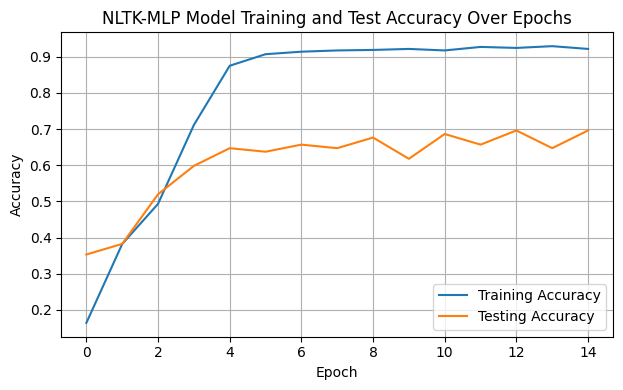

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('NLTK-MLP Model Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.60      0.80      0.69        15
           2       0.67      0.40      0.50         5
           3       0.67      0.78      0.72        23
           4       1.00      0.67      0.80         3
           5       0.71      0.71      0.71         7
           6       0.00      0.00      0.00         6
           7       0.50      0.33      0.40         3
           8       0.90      0.75      0.82        12
           9       0.00      0.00      0.00         3

    accuracy                           0.70       102
   macro avg       0.58      0.53      0.55       102
weighted avg       0.66      0.70      0.67       102



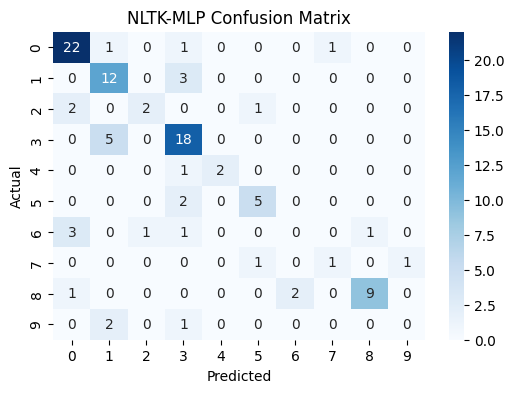

In [ ]:
y_predd=model.predict(X_test_fold)
y_predd=np.argmax(y_predd, axis=1)
y_test=np.argmax(y_test_fold, axis=1)
cm = confusion_matrix(y_test, y_predd)
class_report = classification_report(y_test, y_predd)
print("Classification Report:\n", class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NLTK-MLP Confusion Matrix")
plt.show()
